# Importing important libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly 
import cufflinks as cf
%matplotlib inline
cf.go_offline()
    


# Loading the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\ayush\Downloads\Data analyst data\india covid data\covid_19_india.csv")

# Understanding and exploring the data :

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  18110 non-null  object
 1   State/UnionTerritory  18110 non-null  object
 2   Cured                 18110 non-null  int64 
 3   Deaths                18110 non-null  int64 
 4   Confirmed             18110 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 707.5+ KB


# Checking the Null Values and duplicates:

In [5]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [3]:
df.duplicated().sum()

0


# Droping unnecessary Columns

In [4]:
df.drop(columns=["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [5]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


# Adding New Columns

In [6]:
df["Active Cases"]=df["Confirmed"]-df["Cured"]+df["Deaths"]

In [7]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353,15774
18106,2021-08-11,Tripura,77811,773,80660,3622
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095


In [8]:
df["Recovery Rate (%)"]=np.round(df["Cured"]*100/df["Confirmed"],2)

In [9]:

df["Mortality Rate (%)"]=np.round(df["Deaths"]*100/df["Confirmed"] , 2)



In [10]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases,Recovery Rate (%),Mortality Rate (%)
0,2020-01-30,Kerala,0,0,1,1,0.00,0.00
1,2020-01-31,Kerala,0,0,1,1,0.00,0.00
2,2020-02-01,Kerala,0,0,2,2,0.00,0.00
3,2020-02-02,Kerala,0,0,3,3,0.00,0.00
4,2020-02-03,Kerala,0,0,3,3,0.00,0.00
...,...,...,...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353,15774,98.16,0.59
18106,2021-08-11,Tripura,77811,773,80660,3622,96.47,0.96
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180,97.72,2.15
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095,98.64,1.33


# Pivoting and making table 

In [11]:
State_situation=df.pivot_table(index="State/UnionTerritory",values=["Deaths","Confirmed","Active Cases","Mortality Rate (%)","Recovery Rate (%)"],aggfunc=max)

In [12]:
State_situation=State_situation.sort_values(by="Confirmed",ascending=False)

In [13]:
State_situation.style.background_gradient(cmap="cubehelix")

,Active Cases,Confirmed,Deaths,Mortality Rate (%),Recovery Rate (%)
State/UnionTerritory,,,,,
Maharashtra,829727,6363442,134201,7.510000,96.800000
Maharashtra***,359438,6229596,130753,2.100000,96.330000
Kerala,458370,3586693,18004,0.890000,100.000000
Karnataka,648383,2921049,36848,16.670000,99.280000
Karanataka,99944,2885238,36197,1.250000,97.790000
Tamil Nadu,357936,2579130,34367,3.850000,98.070000
Andhra Pradesh,230727,1985182,13564,3.040000,99.130000
Uttar Pradesh,335923,1708812,22775,3.110000,98.640000
West Bengal,160289,1534999,18252,11.110000,98.150000


# Top 5 active case States 

In [14]:
Top5_Active_Cases=df.groupby("State/UnionTerritory").max()[["Active Cases","Date"]].sort_values(by="Active Cases",ascending=False).reset_index()

In [15]:
Top5_Active_Cases=Top5_Active_Cases.iloc[:5]

Text(0.5, 1.0, 'Top 5 Active Cases States')

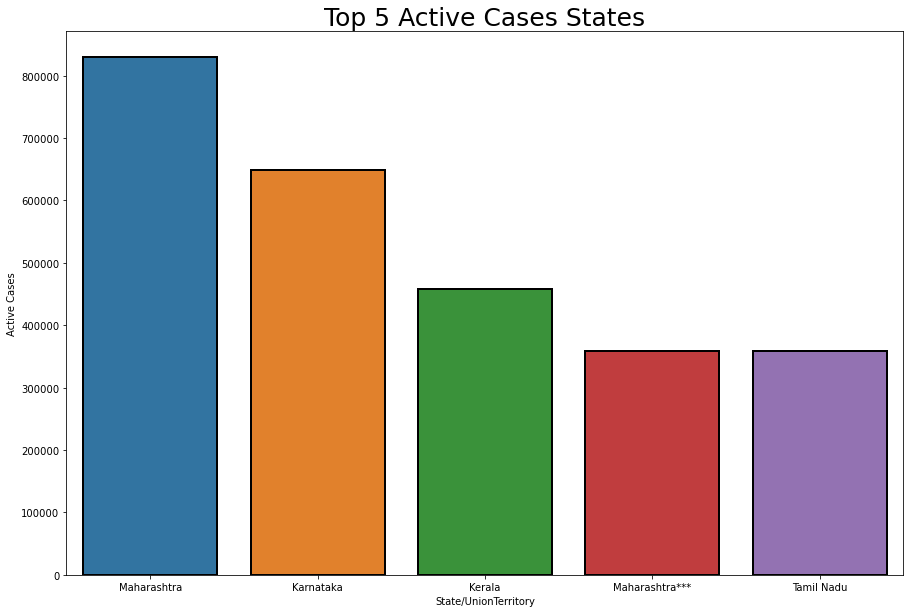

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(x="State/UnionTerritory",y="Active Cases",data=Top5_Active_Cases,linewidth=2,edgecolor="black")
sns.set_style
plt.title("Top 5 Active Cases States",size=25)

# Top5 lowest Active case States

In [63]:
Top5_Lowest_Active_Cases=df.groupby("State/UnionTerritory").max()["Active Cases"].sort_values(ascending=True).reset_index()

In [64]:
Top5_Lowest_Active_Cases=Top5_Lowest_Active_Cases.iloc[:5]

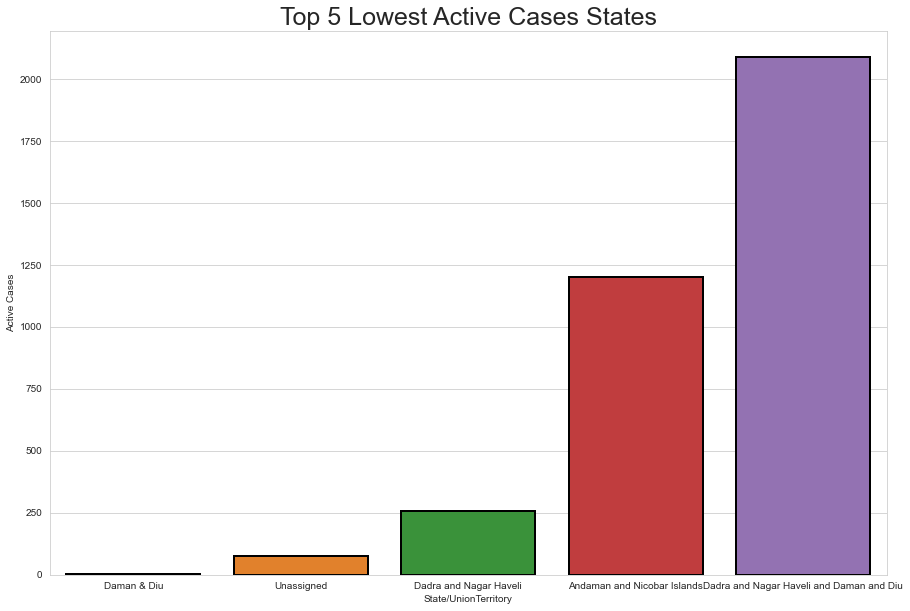

In [66]:
plt.figure(figsize=(15,10))
sns.barplot(x="State/UnionTerritory",y="Active Cases",data=Top5_Lowest_Active_Cases,linewidth=2,edgecolor="black")
sns.set_style("dark")
plt.title("Top 5 Lowest Active Cases States",size=25)
import datetime

# Recovery Rate 

In [26]:
Recovery_Rate=df.groupby("State/UnionTerritory").max()["Recovery Rate (%)"].sort_values(ascending=False).reset_index()

In [27]:
Recovery_Rate

,State/UnionTerritory,Recovery Rate (%)
0,Andaman and Nicobar Islands,100.00
1,Goa,100.00
2,Tripura,100.00
3,Mizoram,100.00
4,Manipur,100.00
5,Kerala,100.00
6,Ladakh,100.00
7,Arunachal Pradesh,100.00
8,Dadra and Nagar Haveli and Daman and Diu,99.94
9,Bihar,99.89


<AxesSubplot:xlabel='State/UnionTerritory', ylabel='Recovery Rate (%)'>

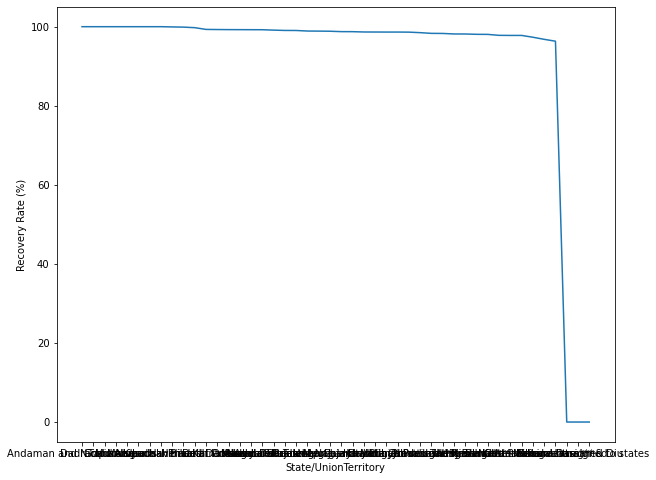

In [28]:
plt.figure(figsize=(10,8))
sns.lineplot(y=Recovery_Rate["Recovery Rate (%)"],x=Recovery_Rate["State/UnionTerritory"],data=Recovery_Rate)

In [17]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases,Recovery Rate (%),Mortality Rate (%)
0,2020-01-30,Kerala,0,0,1,1,0.00,0.00
1,2020-01-31,Kerala,0,0,1,1,0.00,0.00
2,2020-02-01,Kerala,0,0,2,2,0.00,0.00
3,2020-02-02,Kerala,0,0,3,3,0.00,0.00
4,2020-02-03,Kerala,0,0,3,3,0.00,0.00
...,...,...,...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353,15774,98.16,0.59
18106,2021-08-11,Tripura,77811,773,80660,3622,96.47,0.96
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180,97.72,2.15
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095,98.64,1.33


# Top5_Highest Mortality_Rate_States

In [18]:
Top5_Mortality_Rate_States=df.groupby("State/UnionTerritory").max()[["Mortality Rate (%)","Date"]].sort_values(by=["Mortality Rate (%)"],ascending=False).reset_index()

In [19]:
Top5_Mortality_Rate_States=Top5_Mortality_Rate_States.iloc[:5]

In [20]:
Top5_Mortality_Rate_States

,State/UnionTerritory,Mortality Rate (%),Date
0,Punjab,50.00,2021-08-11
1,Bihar,50.00,2021-08-11
2,Himachal Pradesh,33.33,2021-08-11
3,Karnataka,16.67,2021-08-11
4,Delhi,14.29,2021-08-11


Text(0.5, 1.0, 'Top5_Mortality_Rate_States')

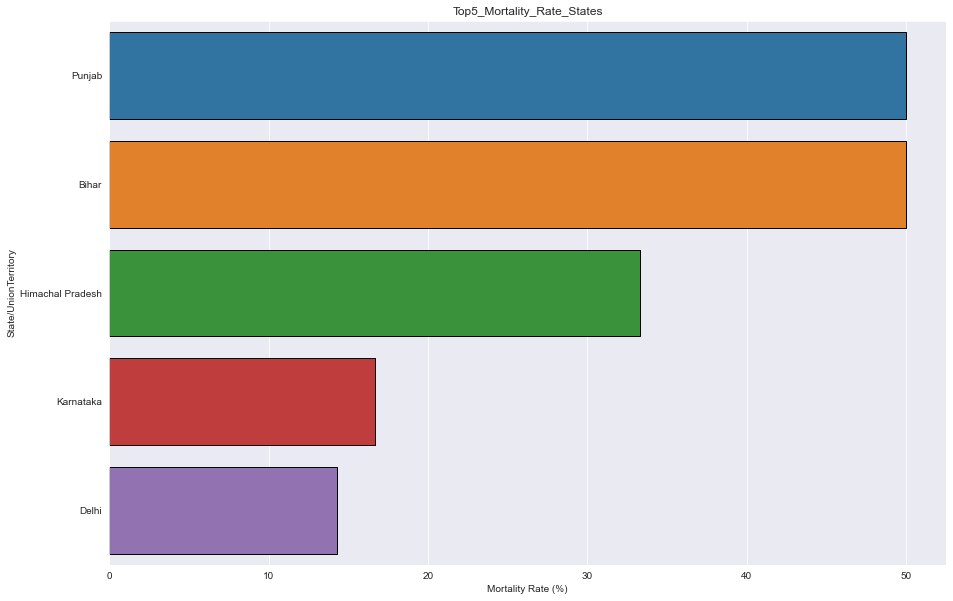

In [61]:
plt.figure(figsize=(15,10))
sns.barplot(x=Top5_Mortality_Rate_States["Mortality Rate (%)"],y=Top5_Mortality_Rate_States["State/UnionTerritory"],linewidth=1,edgecolor="black")
sns.set_style("whitegrid")
plt.title("Top5_Mortality_Rate_States")

# Pie chart for confirmed and cured cases

In [24]:
y=[df["Confirmed"].sum(),df["Cured"].sum()]

([<matplotlib.patches.Wedge at 0x200b284f910>,
 [Text(-0.06671061021337897, 1.0979752704341563, 'Confirmed'),
  Text(0.06671050741351468, -1.0979752766800497, 'Cured')])

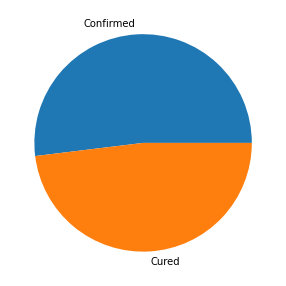

In [25]:
plt.figure(figsize=(5,5))
plt.pie(y,labels=["Confirmed","Cured"])


# Sum Of Cured

In [34]:
TotalCured=df["Cured"].sum()

In [27]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases,Recovery Rate (%),Mortality Rate (%)
0,2020-01-30,Kerala,0,0,1,1,0.00,0.00
1,2020-01-31,Kerala,0,0,1,1,0.00,0.00
2,2020-02-01,Kerala,0,0,2,2,0.00,0.00
3,2020-02-02,Kerala,0,0,3,3,0.00,0.00
4,2020-02-03,Kerala,0,0,3,3,0.00,0.00
...,...,...,...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353,15774,98.16,0.59
18106,2021-08-11,Tripura,77811,773,80660,3622,96.47,0.96
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180,97.72,2.15
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095,98.64,1.33


# Saving the Dataset or exporting

In [ ]:
df.to_csv("Covid_19_Dataset.csv")

# Making lineplot for recovery and Mortality rate

<AxesSubplot:xlabel='Recovery Rate (%)', ylabel='Mortality Rate (%)'>

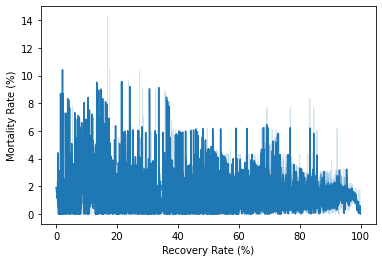

In [46]:
sns.lineplot(x="Recovery Rate (%)",y="Mortality Rate (%)",data=df)

<AxesSubplot:xlabel='Date', ylabel='Deaths'>

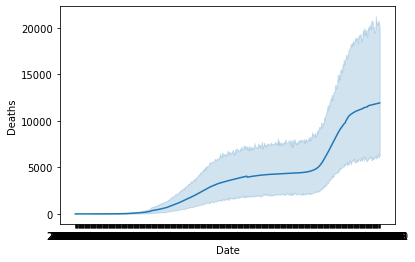

In [44]:
sns.lineplot(x=df.Date,y=df.Deaths,data=df[df["State/UnionTerritory"].isin(["Maharashtra"])])

In [45]:
df[df["State/UnionTerritory"].isin(["Maharashtra"])]

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases,Recovery Rate (%),Mortality Rate (%)
76,2020-03-09,Maharashtra,0,0,2,2,0.00,0.00
91,2020-03-10,Maharashtra,0,0,5,5,0.00,0.00
97,2020-03-11,Maharashtra,0,0,2,2,0.00,0.00
120,2020-03-12,Maharashtra,0,0,11,11,0.00,0.00
133,2020-03-13,Maharashtra,0,0,14,14,0.00,0.00
...,...,...,...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759,345339,96.66,2.11
17986,2021-08-08,Maharashtra,6139493,133845,6347820,342172,96.72,2.11
18022,2021-08-09,Maharashtra,6144388,133996,6353328,342936,96.71,2.11
18058,2021-08-10,Maharashtra,6151956,134064,6357833,339941,96.76,2.11


# Deaths sum groupBY States

In [86]:
df.groupby("State/UnionTerritory")["Deaths"].sum()

State/UnionTerritory
Andaman and Nicobar Islands                    27136
Andhra Pradesh                               2939367
Arunachal Pradesh                              26799
Assam                                         638323
Bihar                                        1093466
Bihar****                                      18881
Cases being reassigned to states                   0
Chandigarh                                    147694
Chhattisgarh                                 2063920
Dadra and Nagar Haveli                             8
Dadra and Nagar Haveli and Daman and Diu        1014
Daman & Diu                                        0
Delhi                                        4943294
Goa                                           447801
Gujarat                                      2219448
Haryana                                      1502799
Himachal Pradesh                              491348
Himanchal Pradesh                               3507
Jammu and Kashmir        

In [48]:
df[df["State/UnionTerritory"].str.contains("Maharashtra")]

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases,Recovery Rate (%),Mortality Rate (%)
76,2020-03-09,Maharashtra,0,0,2,2,0.00,0.00
91,2020-03-10,Maharashtra,0,0,5,5,0.00,0.00
97,2020-03-11,Maharashtra,0,0,2,2,0.00,0.00
120,2020-03-12,Maharashtra,0,0,11,11,0.00,0.00
133,2020-03-13,Maharashtra,0,0,14,14,0.00,0.00
...,...,...,...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759,345339,96.66,2.11
17986,2021-08-08,Maharashtra,6139493,133845,6347820,342172,96.72,2.11
18022,2021-08-09,Maharashtra,6144388,133996,6353328,342936,96.71,2.11
18058,2021-08-10,Maharashtra,6151956,134064,6357833,339941,96.76,2.11


# Totaldeaths

In [30]:
Totaldeaths=df["Deaths"].sum()

In [31]:
Totaldeaths

73389005

# Totalconfirmed

In [33]:
totalconfirmed=df["Confirmed"].sum()

# Making Pie chart for confirmed ,cured and deaths

In [39]:
x=[Totaldeaths,totalconfirmed,TotalCured]

In [40]:
x

[73389005, 5451678687, 5046125452]

([<matplotlib.patches.Wedge at 0x200b9e1d490>,
 [Text(-0.02616999770481522, 1.1997146040705389, 'Totaldeaths'),
  Text(-1.095248811359161, -0.10212757324221937, 'totalconfirmed'),
  Text(1.0972155539553254, 0.07821782506889527, 'TotalCured')],
 [Text(-0.015265831994475544, 0.6998335190411477, '0.7%'),
  Text(-0.5974084425595423, -0.05570594904121056, '51.6%'),
  Text(0.5984812112483593, 0.042664268219397415, '47.7%')])

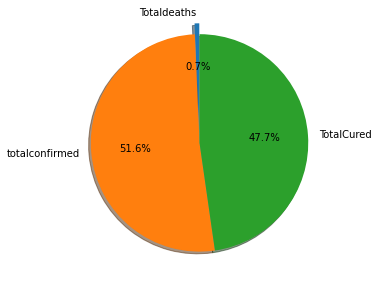

In [57]:
plt.figure(figsize=(5,5))
plt.pie(x,labels=["Totaldeaths","totalconfirmed","TotalCured"],shadow=True,explode=[0.1,0,0],autopct='%1.1f%%',startangle=90)
